In [1]:
%matplotlib inline
import pandas as pd

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24ae126550>,
      dtype=object)

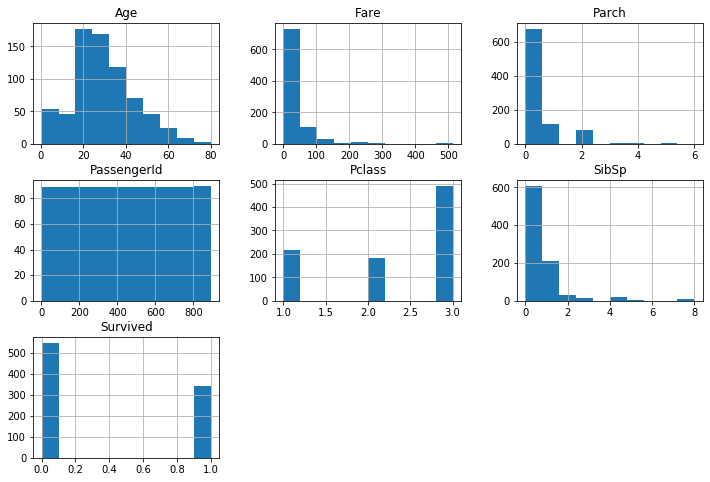

In [5]:
df_train.hist(figsize=(12,8))

```
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object

Drop Column: PassengerId, Name, Ticket, Cabin
Drop Row: Age, Embarked
Convert Categorical data to numeric data: Sex, Embarked
```

In [6]:
#Drop Column: PassengerId, Name, Ticket, Cabin
df1=df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)

In [7]:
df1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [8]:
#Drop Row: Age, Embarked
df2=df1.dropna()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [10]:
df4=df2
df4['sex_cat']=df4['Sex'].astype('category').cat.codes
df4['embarked_cat']=df4['Embarked'].astype('category').cat.codes
df4.head()

/home/wasit/miniconda3/envs/dsi202/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/wasit/miniconda3/envs/dsi202/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  sex_cat  \
0         0       3    male  22.0      1      0   7.2500        S        1   
1         1       1  female  38.0      1      0  71.2833        C        0   
2         1       3  female  26.0      0      0   7.9250        S        0   
3         1       1  female  35.0      1      0  53.1000        S        0   
4         0       3    male  35.0      0      0   8.0500        S        1   

   embarked_cat  
0             2  
1             0  
2             2  
3             2  
4             2

In [11]:
df4.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'sex_cat', 'embarked_cat'],
      dtype='object')

In [12]:
header=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_cat', 'embarked_cat']
df5=df4[header]
df5.head()

Survived  Pclass   Age  SibSp  Parch     Fare  sex_cat  embarked_cat
0         0       3  22.0      1      0   7.2500        1             2
1         1       1  38.0      1      0  71.2833        0             0
2         1       3  26.0      0      0   7.9250        0             2
3         1       1  35.0      1      0  53.1000        0             2
4         0       3  35.0      0      0   8.0500        1             2

In [13]:
yx=df5.to_numpy()
yx

array([[ 0.    ,  3.    , 22.    , ...,  7.25  ,  1.    ,  2.    ],
       [ 1.    ,  1.    , 38.    , ..., 71.2833,  0.    ,  0.    ],
       [ 1.    ,  3.    , 26.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  1.    , 19.    , ..., 30.    ,  0.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  1.    ,  0.    ],
       [ 0.    ,  3.    , 32.    , ...,  7.75  ,  1.    ,  1.    ]])

In [17]:
x_train=yx[:,1:]
y_train=yx[:,0]

In [18]:
x_train.shape

(712, 7)

In [19]:
y_train.shape

(712,)

# Supervised Learning

In [22]:
#conda install scikit-learn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [24]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(x_train, y_train)
np.average( cross_val_score(gb, X_train, y_train, cv=5) )

0.8007261941933802

# Save model

In [26]:
import pickle
filename = 'titanic.model'
pickle.dump(gb, open(filename, 'wb'))

In [31]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_train[:5,:])

array([0., 1., 1., 1., 0.])